# Handwritten digit classification

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from keras.datasets import mnist

import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

Helper function that helps us to visualize dataset images.

In [23]:
#@title
def show_digits(X, y, cmap='gray'):
  X = X.reshape(10, 28, 28)
  fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
  for row in range(2):
    for col in range(5):
      ax = axes[row, col]
      idx = 5 * row + col
      img = X[idx]
      label = y[idx]
      ax.imshow(img, cmap=cmap)
      ax.set_title(f"Label: {label}", size=18)
      ax.axis("off")
  plt.tight_layout()

Load and inspect the dataset.

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Display a random sample from the training set.

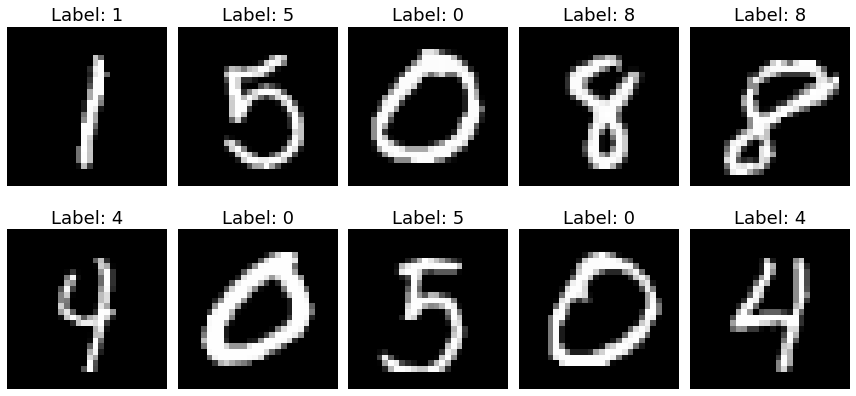

In [25]:
sample = np.random.choice(len(X_train), 10)

X_sample = X_train[sample]
y_sample = y_train[sample]

show_digits(X_sample, y_sample)

Flatten each image into an array of pixels.

In [26]:
n_samples, height, width = X_train.shape
X_train = X_train.reshape(-1, height * width)
X_test = X_test.reshape(-1, height * width)

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

Select a smaller sample for training (similar results, shorter training).

In [27]:
training_samples = 3000

idx = np.random.choice(len(X_train), training_samples)
X_train = X_train[idx]
y_train = y_train[idx]

X_train.shape, y_train.shape

((5000, 784), (5000,))

Create and fit a cross-validation `pipeline`.

In [29]:
pipeline = Pipeline([
    ("ss", StandardScaler()),
    ("lr", LogisticRegressionCV(max_iter=1000))
])

In [30]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('lr', LogisticRegressionCV(max_iter=1000))])

Test our predictive `pipeline` with the test set.

In [32]:
y_pred = pipeline.predict(X_test)

In [33]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average="macro")
recall = metrics.recall_score(y_test, y_pred, average="macro")
f1 = metrics.f1_score(y_test, y_pred, average="macro")

print("Accuracy: %.2f, Precision: %.2f, Recall: %.2f, F1: %.2f" % (accuracy, precision, recall, f1))

Accuracy: 0.90, Precision: 0.90, Recall: 0.90, F1: 0.90


Plot the confusion matrix.

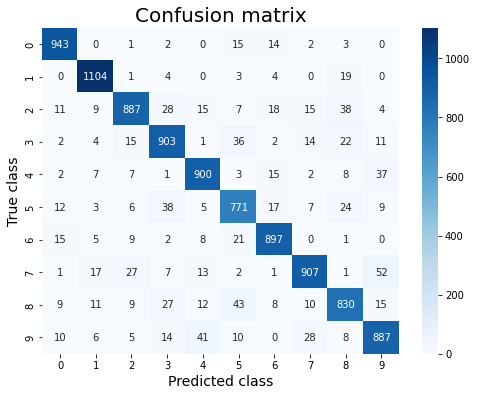

In [35]:
plt.figure(figsize=(8, 6))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
hm = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

hm.set_xlabel("Predicted class", fontsize=14)
hm.set_ylabel("True class", fontsize=14)
hm.set_title('Confusion matrix', size=20)
plt.show()

Visualize the feature (pixel) importance of our model.

In [36]:
classifier = pipeline['lr']

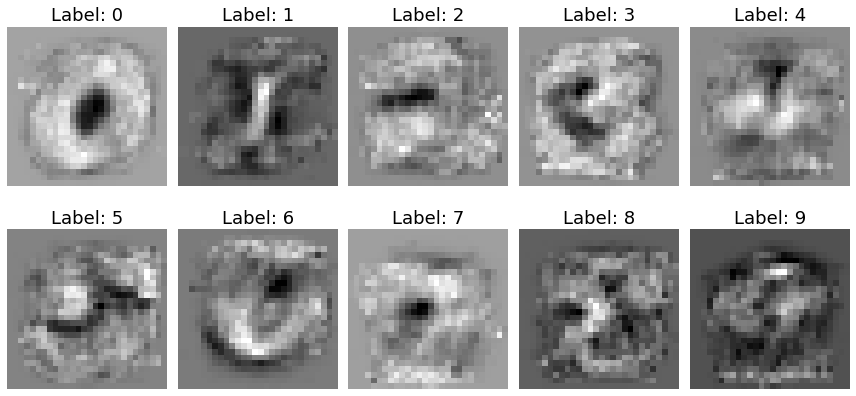

In [40]:
label = range(10)
coef = classifier.coef_
coef = coef.reshape(10, 28, 28)

show_digits(coef, label)